<a href="https://colab.research.google.com/github/ScriptSherpa/demoprojects/blob/main/A_Comprehensive_Data_Analysis_on_a_NANDU_Chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''

    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }

    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns

        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df

    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])

    # split user and msg
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)

    return df



## *Prior Information of my Whatsapp Data*
- This is my most active college coding group.
- It has **235+** participants; 237 to be precise.
- This group was made in **January 2020.**


In [ ]:
!pip install emoji
import re
import pandas as pd
import numpy as np
import emoji # The emoji module is now available
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    return False

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])

    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message

In [ ]:
data=[]
conversation='/content/WhatsApp Chat with Tar Tur Dombe 💦.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

import re
import pandas as pd
import numpy as np
import emoji # The emoji module is now available
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna() # The original dataframe is assigned to data here

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()

# Perform sentiment analysis and assign the results back to the 'data' DataFrame
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head()

<ipython-input-43-71995d50185d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])
<ipython-input-43-71995d50185d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
<ipython-input-43-71995d50185d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ne

,Date,Time,contact,Message,positive,negative,neutral
1,2023-08-25,16:10,Cdt.NIKHIL MALVI,Hi,0.0,0.0,1.0
2,2023-08-25,16:11,Cdt.NIKHIL MALVI,Udaya sang bagwat sir la m-20 nikhil malvi all...,0.0,0.0,1.0
3,2023-08-25,16:11,Cdt.NIKHIL MALVI,Fever pan alta class madhe bol,0.0,0.0,1.0
4,2023-08-25,16:17,Tar Tur Dombe 💦,Okk,0.0,0.0,1.0
5,2023-08-26,11:57,Cdt.NIKHIL MALVI,Gelta kai,0.0,0.0,1.0


In [ ]:
df.contact.unique()

array([None, 'Cdt.NIKHIL MALVI', 'Tar Tur Dombe 💦'], dtype=object)

In [ ]:
media_messages = df[df['Message'] == 'Oke'].shape[0]
print(media_messages)

0


In [ ]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [ ]:
import regex
import emoji

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):  # Use emoji.EMOJI_DATA instead
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
df.head(50)

,Date,Time,contact,Message,emoji
0,2023-08-25,08:25,None,Cdt.NIKHIL MALVI: https://csdtoday.com/two-whe...,[]
1,2023-08-25,16:10,Cdt.NIKHIL MALVI,Hi,[]
2,2023-08-25,16:11,Cdt.NIKHIL MALVI,Udaya sang bagwat sir la m-20 nikhil malvi all...,[]
3,2023-08-25,16:11,Cdt.NIKHIL MALVI,Fever pan alta class madhe bol,[]
4,2023-08-25,16:17,Tar Tur Dombe 💦,Okk,[]
5,2023-08-26,11:57,Cdt.NIKHIL MALVI,Gelta kai,[]
6,2023-08-26,12:00,Tar Tur Dombe 💦,Ha,[]
7,2023-08-26,12:15,Cdt.NIKHIL MALVI,Ye paenav vats ka kya hai,[]
8,2023-08-26,12:15,Cdt.NIKHIL MALVI,Kitne log ayethe,[]
9,2023-08-26,12:15,Cdt.NIKHIL MALVI,Kuch bole kya merko,[]


In [ ]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('🤣', 59)
('💦', 37)
('🥲', 30)
('🔹', 13)
('👍', 9)
('🚀', 7)
('😈', 7)
('🙃', 7)
('📌', 7)
('💀', 6)
('🌚', 6)
('😑', 6)
('✅', 6)
('🗿', 6)
('🙏', 5)
('😭', 5)
('🤔', 4)
('😗', 4)
('😌', 4)
('🌟', 3)
('📅', 3)
('💡', 3)
('🙂', 3)
('🥴', 3)
('💬', 2)
('🌐', 2)
('❤️', 2)
('😎', 2)
('☠️', 2)
('👉', 2)
('👈', 2)
('😄', 2)
('👇', 2)
('📝', 2)
('💖', 2)
('🍑', 2)
('🏏', 1)
('👑', 1)
('⏰', 1)
('📍', 1)
('🕒', 1)
('🧠', 1)
('🛠', 1)
('⏱', 1)
('🖼', 1)
('🎙', 1)
('📢', 1)
('🚨', 1)
('🔜', 1)
('🤗', 1)
('😕', 1)
('😃', 1)
('😵\u200d💫', 1)
('😍', 1)
('🎓', 1)
('📲', 1)
('‼️', 1)
('🔗', 1)
('💼', 1)
('😅', 1)
('😂', 1)
('📺', 1)
('🕥', 1)
('🌏', 1)
('💪', 1)
('💻', 1)
('🎉', 1)
('🤕', 1)
('🤝', 1)
('🍼', 1)
('🤬', 1)
('🫦', 1)
('👆', 1)
('🔴', 1)
('🫱🏻\u200d🫲🏿', 1)
('👐', 1)
('😔', 1)
('🙂\u200d↕', 1)
('😞', 1)


There are 87891 words in all the messages.


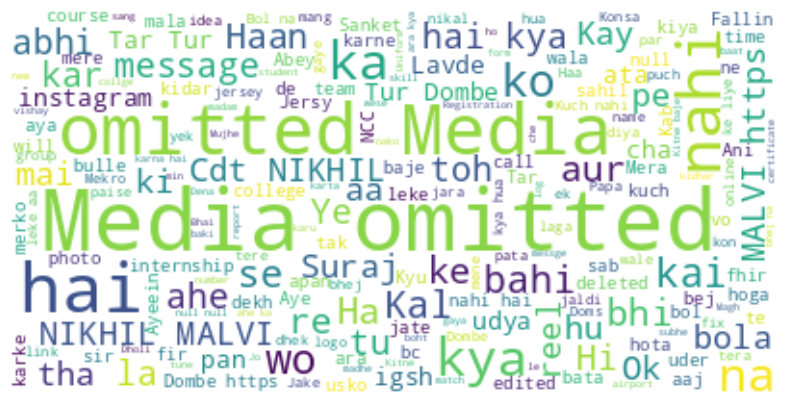

In [ ]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()